In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
bank_df = pd.read_csv('Bank_Customer_retirement.csv') 

In [4]:
bank_df

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [6]:
bank_df.drop(['Customer ID'], axis=1)

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


In [7]:
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [8]:
bank_df.shape

(500, 4)

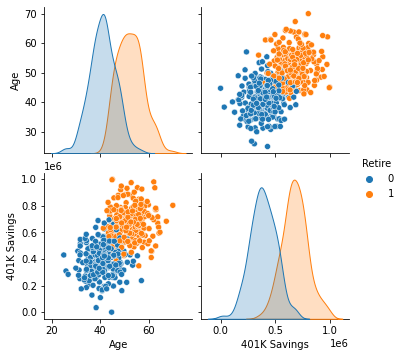

In [10]:
sns.pairplot(bank_df, hue='Retire', vars=['Age', '401K Savings'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Retire', ylabel='count'>

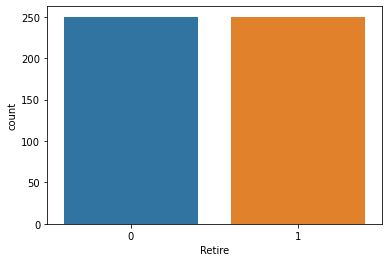

In [13]:
sns.countplot(bank_df['Retire'], label = 'Retirement')

In [14]:
bank_df = bank_df.drop(['Customer ID'], axis=1)

In [15]:
bank_df

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


In [17]:
X = bank_df.drop(['Retire'], axis=1)
y = bank_df['Retire']

In [18]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [19]:
X.shape

(500, 2)

In [20]:
y.shape

(500,)

In [22]:
from sklearn.model_selection import train_test_split
X_test, X_train,y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix







svc_model = SVC()

svc_model.fit(X_train, y_train)


y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

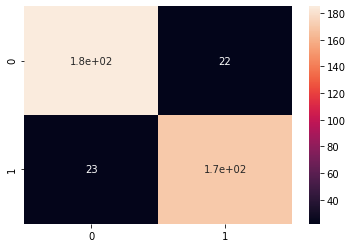

In [25]:
sns.heatmap(cm, annot=True)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       207
           1       0.89      0.88      0.88       193

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [28]:
min_train = X_train.min()


In [30]:
range_train = (X_train - min_train).max()

In [31]:
X_train_scaled = (X_train-min_train)/ range_train

In [32]:
X_train_scaled

,Age,401K Savings
90,0.647981,0.596724
254,0.215271,0.365220
283,0.397837,0.476404
445,0.322917,0.320280
461,0.663191,0.748293
...,...,...
372,0.391712,0.276325
56,0.491488,0.623615
440,0.419550,0.822810
60,0.484390,0.576654


In [33]:
X_train_scaled

,Age,401K Savings
90,0.647981,0.596724
254,0.215271,0.365220
283,0.397837,0.476404
445,0.322917,0.320280
461,0.663191,0.748293
...,...,...
372,0.391712,0.276325
56,0.491488,0.623615
440,0.419550,0.822810
60,0.484390,0.576654


# ここがポイントかな

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

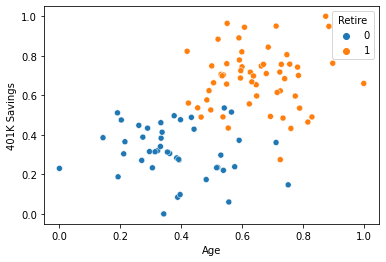

In [36]:
sns.scatterplot(x = X_train_scaled['Age'], y=X_train_scaled['401K Savings'], hue=y_train)

In [37]:
min_test = X_test.min()

In [40]:
test_range = (X_test-min_test).max()

In [41]:
X_test_scaled = (X_test-min_test)/test_range

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

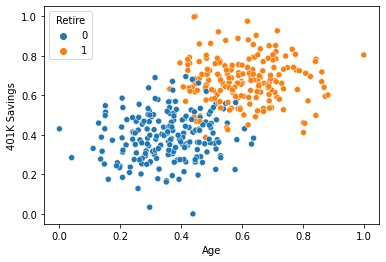

In [43]:
sns.scatterplot(X_test_scaled['Age'], X_test_scaled['401K Savings'], hue=y_test)

In [47]:
params_grid = {'C':[0.1,1,10,100,1000], 'gamma':[0.1,0.01, 0.001], 'kernel':['rbf']}

In [49]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svc_model, params_grid, verbose=4)

In [52]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=4)

In [53]:
grid.best_score_

0.95

In [54]:
grid_pred = grid.predict(X_test_scaled)

In [55]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

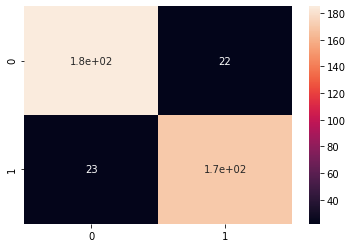

In [56]:
sns.heatmap(cm, annot=True)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       207
           1       0.89      0.88      0.88       193

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       207
           1       0.89      0.88      0.88       193

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

